In [ ]:
import pandas as pd

df_train = pd.read_csv('/content/drive/MyDrive/SIGNATE/DATASET/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/SIGNATE/DATASET/test.csv')

df_train = df_train.drop('state', axis=1)

df = pd.concat([df_train, df_test], axis=0)

print('df_train shape: {0}, df_test shape: {1}, df shape: {2}'.format(df_train.shape, df_test.shape, df.shape))

df_train shape: (10545, 7), df_test shape: (10544, 7), df shape: (21089, 7)


# goal

In [ ]:
df_goal = df['goal'].replace('100000+', '100000-100000')
df_goal = df_goal.str.split('-', expand=True)
df_goal.rename(columns={0: 'min', 1: 'max'}, inplace=True)
df_goal['min'] = df_goal['min'].astype(int)
df_goal['max'] = df_goal['max'].astype(int)
df_goal.head()

,min,max
0,4001,5000
1,3001,4000
2,19001,20000
3,2001,3000
4,2001,3000


In [ ]:
print(df['goal'].nunique())
print(df_goal['min'].nunique())
print(df_goal['max'].nunique())

101
101
100


In [ ]:
df['goal'].unique()

array(['4001-5000', '3001-4000', '19001-20000', '2001-3000', '1-1000',
       '1001-2000', '11001-12000', '100000+', '9001-10000', '29001-30000',
       '6001-7000', '38001-39000', '16001-17000', '8001-9000',
       '13001-14000', '7001-8000', '59001-60000', '5001-6000',
       '22001-23000', '84001-85000', '64001-65000', '96001-97000',
       '28001-29000', '37001-38000', '49001-50000', '14001-15000',
       '34001-35000', '74001-75000', '10001-11000', '52001-53000',
       '26001-27000', '12001-13000', '15001-16000', '83001-84000',
       '40001-41000', '24001-25000', '99001-100000', '35001-36000',
       '65001-66000', '17001-18000', '57001-58000', '44001-45000',
       '67001-68000', '56001-57000', '43001-44000', '39001-40000',
       '79001-80000', '61001-62000', '25001-26000', '33001-34000',
       '27001-28000', '23001-24000', '20001-21000', '69001-70000',
       '47001-48000', '31001-32000', '54001-55000', '21001-22000',
       '41001-42000', '90001-91000', '93001-94000', '8500

In [ ]:
df_mean = df_goal.mean(axis=1)
df_goal = pd.concat([df_goal, df_mean], axis=1)
df_goal.rename(columns={0: 'mean'}, inplace=True)
df_25 = df_goal.quantile(q=0.25, axis=1)
df_75 = df_goal.quantile(q=0.75, axis=1)
df_goal = pd.concat([df_goal, df_25, df_75], axis=1)
df_goal.head()

,min,max,mean,0.25,0.75
0,4001,5000,4500.5,4250.75,4750.25
1,3001,4000,3500.5,3250.75,3750.25
2,19001,20000,19500.5,19250.75,19750.25
3,2001,3000,2500.5,2250.75,2750.25
4,2001,3000,2500.5,2250.75,2750.25


In [ ]:
pd.qcut(df_goal['min'], 3, labels=['min_Q1', 'min_Q2', 'min_Q3'])

0        min_Q2
1        min_Q2
2        min_Q3
3        min_Q1
4        min_Q1
          ...  
10539    min_Q3
10540    min_Q1
10541    min_Q1
10542    min_Q1
10543    min_Q1
Name: min, Length: 21089, dtype: category
Categories (3, object): ['min_Q1' < 'min_Q2' < 'min_Q3']

In [ ]:
pd.qcut(df_goal['max'], 3, labels=['max_Q1', 'max_Q2', 'max_Q3'])

0        max_Q2
1        max_Q2
2        max_Q3
3        max_Q1
4        max_Q1
          ...  
10539    max_Q3
10540    max_Q1
10541    max_Q1
10542    max_Q1
10543    max_Q1
Name: max, Length: 21089, dtype: category
Categories (3, object): ['max_Q1' < 'max_Q2' < 'max_Q3']

In [ ]:
df_goal['min'].astype(int)

0         4001
1         3001
2        19001
3         2001
4         2001
         ...  
10539     9001
10540        1
10541     1001
10542     2001
10543     1001
Name: min, Length: 21089, dtype: int64

# country

In [ ]:
df['country'].value_counts()

US    14919
GB     2277
CA      959
AU      564
DE      322
FR      314
MX      287
IT      248
SE      171
NL      165
ES      161
DK      118
HK      107
NZ       87
IE       78
SG       60
NO       58
BE       54
CH       54
JP       40
AT       39
LU        7
Name: country, dtype: int64

# duration

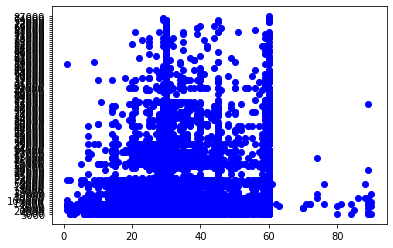

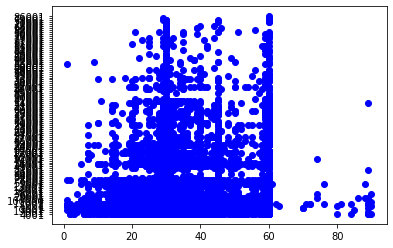

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['duration'], df_goal['max'], 'bo')

plt.figure()
plt.plot(df['duration'], df_goal['min'], 'bo')

plt.show()

# category1 and category2

In [ ]:
df.duplicated(subset=['category1', 'category2'])

0        False
1        False
2        False
3        False
4        False
         ...  
10539     True
10540     True
10541     True
10542     True
10543     True
Length: 21089, dtype: bool

In [ ]:
df[['category1', 'category2']].tail()

,category1,category2
10539,food,drinks
10540,food,small batch
10541,crafts,pottery
10542,design,graphic design
10543,fashion,ready-to-wear


In [ ]:
df['category1'].value_counts()

film & video    3170
music           3154
art             2193
food            2154
publishing      1988
technology      1731
fashion         1079
photography      951
games            918
crafts           877
theater          811
journalism       614
design           579
comics           476
dance            394
Name: category1, dtype: int64

In [ ]:
for i in df['category2'].value_counts().index:
  for j in df['category1'].value_counts().index:
    if i == j:
      print(i)

In [ ]:
df[df['category1'] == 'drinks']

,id,goal,country,duration,category1,category2,html_content


# TIPS

In [ ]:
def TIPS(df):
  df.value_counts # ユニークな要素の値と出現個数

# EDA